# **Importacion de librerias**

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# **Carga de archivos (Conjunto de datos)**

In [3]:
# Cargar el archivo CSV
csv_file_path = 'Dataset/JPvideos_cc50_202101.csv'
df = pd.read_csv(csv_file_path)

# Cargar el archivo JSON
json_file_path = 'Dataset/JP_category_id.json'
with open(json_file_path, 'r') as f:
    categories = json.load(f)

# Convertir el JSON a un DataFrame
categories_df = pd.json_normalize(categories['items'])
categories_df = categories_df[['id', 'snippet.title']]
categories_df.columns = ['category_id', 'category_title']
categories_df['category_id'] = categories_df['category_id'].astype(int)

# **INSPECCION DE LOS DATOS**

In [4]:
# Mostrar las primeras filas del DataFrame
print("Las primeras filas del DataFrame: ")
display(df.head())

Las primeras filas del DataFrame: 


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,5ugKfHgsmYw,18/07/2002,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25.0,05/02/2018 22:04,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085.0,591.0,189.0,0.0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,VERDADERO,FALSO,FALSO,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...,Kyoto,35.450406,135.333331,POINT (135.3333309 35.4504059)
1,ohObafdd34Y,18/07/2002,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1.0,05/02/2018 23:01,[none],90929.0,442.0,88.0,174.0,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,FALSO,FALSO,FALSO,NaN,Ishikawa,36.560002,136.640021,POINT (136.6400211 36.56000226)
2,aBr2kKAHN6M,18/07/2002,Live Views of Starman,SpaceX,28.0,06/02/2018 16:38,[none],6408303.0,165892.0,2331.0,3006.0,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,FALSO,FALSO,FALSO,NaN,Akita,39.709991,140.089991,POINT (140.0899914 39.70999086)
3,5wNnwChvmsQ,18/07/2002,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25.0,06/02/2018 1:08,アシタノワダイ,96255.0,1165.0,277.0,545.0,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,FALSO,FALSO,FALSO,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...,Kochi,33.562433,133.537523,POINT (133.5375232 33.56243329)
4,B7J47qFvdsk,18/07/2002,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1.0,05/02/2018 21:30,[none],108408.0,1336.0,74.0,201.0,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,FALSO,FALSO,FALSO,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...,Mie,34.717066,136.516670,POINT (136.5166695 34.71706565)


In [5]:
# Mostrar información general del DataFrame
print("Información general del DataFrame")
display(df.info())


Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21718 entries, 0 to 21717
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                21445 non-null  object 
 1   trending_date           8318 non-null   object 
 2   title                   20528 non-null  object 
 3   channel_title           20528 non-null  object 
 4   category_id             20524 non-null  float64
 5   publish_time            20523 non-null  object 
 6   tags                    20525 non-null  object 
 7   views                   20522 non-null  float64
 8   likes                   20522 non-null  float64
 9   dislikes                20522 non-null  float64
 10  comment_count           20522 non-null  float64
 11  thumbnail_link          20522 non-null  object 
 12  comments_disabled       20522 non-null  object 
 13  ratings_disabled        20522 non-null  object 
 14  vide

None

In [6]:
# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas")
display(df.describe())

Estadísticas descriptivas


,category_id,views,likes,dislikes,comment_count,lat,lon
count,20524.000000,2.052200e+04,2.052200e+04,20522.000000,20522.000000,21718.000000,21718.000000
mean,19.806909,2.620338e+05,8.059978e+03,366.841146,1196.135805,35.469712,136.143973
std,6.656333,1.294969e+06,8.385039e+04,2658.662131,14943.970100,2.623478,3.663665
min,1.000000,7.980000e+02,0.000000e+00,0.000000,0.000000,26.207172,127.672972
25%,17.000000,1.710400e+04,1.210000e+02,9.000000,19.000000,34.223116,133.537523
50%,22.000000,6.408850e+04,6.480000e+02,43.000000,133.000000,35.450406,136.516670
75%,24.000000,1.833670e+05,2.303000e+03,178.000000,488.000000,36.549977,139.491062
max,29.000000,6.279639e+07,4.470923e+06,119053.000000,905925.000000,42.930414,143.170010


In [7]:
# Mostrar nombres de las columnas
display(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [8]:
# Unir el DataFrame de videos con el DataFrame de categorías
df = df.merge(categories_df, how='left', left_on='category_id', right_on='category_id')

# Mostrar las primeras filas del DataFrame combinado
display(df.head())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category_title
0,5ugKfHgsmYw,18/07/2002,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25.0,05/02/2018 22:04,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085.0,591.0,189.0,...,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,VERDADERO,FALSO,FALSO,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...,Kyoto,35.450406,135.333331,POINT (135.3333309 35.4504059),News & Politics
1,ohObafdd34Y,18/07/2002,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1.0,05/02/2018 23:01,[none],90929.0,442.0,88.0,...,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,FALSO,FALSO,FALSO,NaN,Ishikawa,36.560002,136.640021,POINT (136.6400211 36.56000226),Film & Animation
2,aBr2kKAHN6M,18/07/2002,Live Views of Starman,SpaceX,28.0,06/02/2018 16:38,[none],6408303.0,165892.0,2331.0,...,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,FALSO,FALSO,FALSO,NaN,Akita,39.709991,140.089991,POINT (140.0899914 39.70999086),Science & Technology
3,5wNnwChvmsQ,18/07/2002,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25.0,06/02/2018 1:08,アシタノワダイ,96255.0,1165.0,277.0,...,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,FALSO,FALSO,FALSO,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...,Kochi,33.562433,133.537523,POINT (133.5375232 33.56243329),News & Politics
4,B7J47qFvdsk,18/07/2002,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1.0,05/02/2018 21:30,[none],108408.0,1336.0,74.0,...,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,FALSO,FALSO,FALSO,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...,Mie,34.717066,136.516670,POINT (136.5166695 34.71706565),Film & Animation


In [9]:
def create_frequency_table(column):
    # Frecuencia absoluta
    abs_freq = column.value_counts().sort_index()
    
    # Frecuencia relativa
    rel_freq = column.value_counts(normalize=True).sort_index()
    
    # Frecuencia acumulada
    abs_cum_freq = abs_freq.cumsum()
    
    # Frecuencia relativa acumulada
    rel_cum_freq = rel_freq.cumsum()
    
    # Crear DataFrame de la tabla de frecuencia
    freq_table = pd.DataFrame({
        'Frecuencia Absoluta': abs_freq,
        'Frecuencia Relativa': rel_freq,
        'Frecuencia Acumulada': abs_cum_freq,
        'Frecuencia Relativa Acumulada': rel_cum_freq
    })
    
    return freq_table

# Crear tablas de frecuencia para cada columna
video_id_freq_table = create_frequency_table(df['video_id'])
print("Tabla de Frecuencia para video_id:")
display(video_id_freq_table)

Tabla de Frecuencia para video_id:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
video_id,,,,
フリーBGM DOVA-SYNDROME by http://dova-s.jp/,2,0.000093,2,0.000093
#NAME?,282,0.013150,284,0.013243
------------------------------------------------------------------------------,2,0.000093,286,0.013336
------------------------------------------------------------------------------,2,0.000093,288,0.013430
-000V8w3RbI,1,0.000047,289,0.013476
...,...,...,...,...
＊古川優香＊,1,0.000047,21437,0.999627
＞ PIXTA ＜,2,0.000093,21439,0.999720
＠atsushi314,2,0.000093,21441,0.999813


In [10]:

trending_date_freq_table = create_frequency_table(df['trending_date'])
print("\nTabla de Frecuencia para trending_date:")
display(trending_date_freq_table)


Tabla de Frecuencia para trending_date:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
trending_date,,,,
01/01/8681,1,0.000120,1,0.000120
18/01/2003,166,0.019957,167,0.020077
18/01/2004,190,0.022842,357,0.042919
18/01/2005,152,0.018274,509,0.061193
18/01/2006,182,0.021880,691,0.083073
18/02/2003,191,0.022962,882,0.106035
18/02/2004,186,0.022361,1068,0.128396
18/02/2005,187,0.022481,1255,0.150878
18/02/2006,163,0.019596,1418,0.170474


In [11]:
title_freq_table = create_frequency_table(df['title'])
print("\nTabla de Frecuencia para title:")
display(title_freq_table)



Tabla de Frecuencia para title:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
title,,,,
manga youtube,1,0.000049,1,0.000049
powerful others in this world aren't as thrilled to have him there,1,0.000049,2,0.000097
videos,2,0.000097,4,0.000195
!t Live Special : The 7th MUGI-BOX SHINee,1,0.000049,5,0.000244
#00 雉尾つぐ,4,0.000195,9,0.000438
...,...,...,...,...
🔴5/14 大谷翔平１１奪三振ショーでスタオベ！大歓声でスタジアムが揺れる映像！（現地ファン映像まとめ）【スカッとＧＪ】 Shohei Ohtani ANGEL STADIUM,1,0.000049,20524,0.999805
🔴【MHWカメラ】メイドさんがモンハンパンケーキアート作ってみたら･･･？！ギルカ配布も！【5万人記念初見歓迎LIVE#】🎀 ˚｡◌,1,0.000049,20525,0.999854
🔴【打撃練習】大谷翔平の３階席150M特大弾に現地ファンも震撼｢ワオ～ オ～マイッ ゴッド｣ｗｗ 【スカッとＧＪ】Shohei Ohtani vs Colorado Rockies,1,0.000049,20526,0.999903


In [12]:
channel_title_freq_table = create_frequency_table(df['channel_title'])
print("\nTabla de Frecuencia para channel_title:")
display(channel_title_freq_table)


Tabla de Frecuencia para channel_title:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
channel_title,,,,
and restaurant guides. Stay current on the latest food trends,2,0.000097,2,0.000097
"and they kick him to the edge of the world just as Tsukuyomi declares that he must leave Makoto to find his own way. Now it's up to Makoto to find his own way.""",1,0.000049,3,0.000146
new manga,1,0.000049,4,0.000195
!!8時だよ面白ネタ大集合,1,0.000049,5,0.000244
!BTS・TWICE まとめ,1,0.000049,6,0.000292
...,...,...,...,...
２８（ふたば）ちゃんねる,2,0.000097,20515,0.999367
５分でできる DIY,8,0.000390,20523,0.999756
ＢＡＳＨｔｖ,2,0.000097,20525,0.999854


In [13]:
category_id_freq_table = create_frequency_table(df['category_id'])
print("\nTabla de Frecuencia para category_id:")
display(category_id_freq_table)


Tabla de Frecuencia para category_id:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
category_id,,,,
1.0,1220,0.059443,1220,0.059443
2.0,280,0.013643,1500,0.073085
7.0,1,0.000049,1501,0.073134
10.0,1290,0.062853,2791,0.135987
15.0,1127,0.054911,3918,0.190898
17.0,2037,0.099250,5955,0.290148
19.0,143,0.006967,6098,0.297116
20.0,1030,0.050185,7128,0.347301
22.0,3915,0.190752,11043,0.538053


In [14]:
publish_time_freq_table = create_frequency_table(df['publish_time'])
print("\nTabla de Frecuencia para publish_time:")
display(publish_time_freq_table)


Tabla de Frecuencia para publish_time:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
publish_time,,,,
01/03/2018 0:00,6,0.000292,6,0.000292
01/03/2018 0:12,2,0.000097,8,0.000390
01/03/2018 0:24,4,0.000195,12,0.000585
01/03/2018 0:43,1,0.000049,13,0.000633
01/03/2018 0:45,1,0.000049,14,0.000682
...,...,...,...,...
31/05/2018 8:16,4,0.000195,20513,0.999513
31/05/2018 8:41,4,0.000195,20517,0.999708
31/05/2018 8:56,2,0.000097,20519,0.999805


In [15]:
tags_freq_table = create_frequency_table(df['tags'])
print("\nTabla de Frecuencia para tags:")
display(tags_freq_table)


Tabla de Frecuencia para tags:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
tags,,,,
mangavideo,1,0.000049,1,0.000049
#2,2,0.000097,3,0.000146
"#LOVECARS|""LOVECARS""|""河口まなぶ""|""自動車動画""|""クルマ""|""自動車""|""新車レビュー""|""試乗レビュー""|""LOVECARS!TV!""|""新車試乗""|""試乗動画""",1,0.000049,4,0.000195
"#LOVECARS|""LOVECARS""|""河口まなぶ""|""自動車動画""|""クルマ""|""自動車""|""新車レビュー""|""試乗レビュー""|""LOVECARS!TV!""|""新車試乗""|""試乗動画""|""メルセデス""|""AMG GT""|""AMG GT 4Door""|""AMG GT 4Door 63S4MATIC＋""",1,0.000049,5,0.000244
"#PS4Live|""PlayStation 4""|""Sony Interactive Entertainment""|""Fortnite""",3,0.000146,8,0.000390
...,...,...,...,...
"Ｋのフィッシングちゃんねる|""バス釣り""|""バスフィッシング""|""釣り""|""ブラックバス""|""おかっぱり""|""陸っぱり""|""ロッド、リール関係""|""バンタムMGL""|""シマノ""|""18""|""ベイトリール""|""キャスティング""|""メタニウムMGL""|""カルカッタコンクエスト""|""アンタレスDC""",1,0.000049,20519,0.999708
"ＮＨＫ|""マイルカップ""|""Ｇ１""|""競馬""|""予想""|""無料""|""動画""|""ランキング""|""人気""|""的中""|""皐月賞""|""馬券""|""ＪＡＷＳ""|""波乱""|""ＮＨＫマイル""|""2018""|""万馬券""|""大穴""|""タワーオブロンドン""",1,0.000049,20520,0.999756
"ＳＨＩＮee|""めざましテレビ""|""SHINee""",2,0.000097,20522,0.999854


In [16]:
views_freq_table = create_frequency_table(df['views'])
print("\nTabla de Frecuencia para views:")
display(views_freq_table)


Tabla de Frecuencia para views:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
views,,,,
798.0,2,0.000097,2,0.000097
962.0,2,0.000097,4,0.000195
1002.0,2,0.000097,6,0.000292
1075.0,1,0.000049,7,0.000341
1151.0,1,0.000049,8,0.000390
...,...,...,...,...
27470728.0,2,0.000097,20515,0.999659
27973210.0,1,0.000049,20516,0.999708
30180849.0,1,0.000049,20517,0.999756


In [17]:
likes_freq_table = create_frequency_table(df['likes'])
print("\nTabla de Frecuencia para likes:")
display(likes_freq_table)


Tabla de Frecuencia para likes:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
likes,,,,
0.0,1392,0.067830,1392,0.067830
1.0,2,0.000097,1394,0.067927
2.0,5,0.000244,1399,0.068171
3.0,6,0.000292,1405,0.068463
4.0,17,0.000828,1422,0.069291
...,...,...,...,...
1956259.0,1,0.000049,20515,0.999659
1956268.0,1,0.000049,20516,0.999708
2050596.0,1,0.000049,20517,0.999756


In [18]:
dislikes_freq_table = create_frequency_table(df['dislikes'])
print("\nTabla de Frecuencia para dislikes:")
display(dislikes_freq_table)


Tabla de Frecuencia para dislikes:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
dislikes,,,,
0.0,1679,0.081815,1679,0.081815
1.0,432,0.021051,2111,0.102865
2.0,451,0.021976,2562,0.124842
3.0,466,0.022707,3028,0.147549
4.0,421,0.020515,3449,0.168064
...,...,...,...,...
59111.0,1,0.000049,20514,0.999610
64943.0,2,0.000097,20516,0.999708
118983.0,1,0.000049,20517,0.999756


In [19]:
comment_count_freq_table = create_frequency_table(df['comment_count'])
print("\nTabla de Frecuencia para comment_count:")
display(comment_count_freq_table)


Tabla de Frecuencia para comment_count:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
comment_count,,,,
0.0,1816,0.088490,1816,0.088490
1.0,257,0.012523,2073,0.101014
2.0,296,0.014424,2369,0.115437
3.0,286,0.013936,2655,0.129373
4.0,260,0.012669,2915,0.142043
...,...,...,...,...
326719.0,1,0.000049,20515,0.999659
387397.0,1,0.000049,20516,0.999708
401470.0,1,0.000049,20517,0.999756


In [20]:
thumbnail_link_freq_table = create_frequency_table(df['thumbnail_link'])
print("\nTabla de Frecuencia para thumbnail_link:")
display(thumbnail_link_freq_table)


Tabla de Frecuencia para thumbnail_link:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
thumbnail_link,,,,
https://i.ytimg.com/vi/--Tpfju7HOs/default.jpg,1,0.000049,1,0.000049
https://i.ytimg.com/vi/--Y6WTlMEVM/default.jpg,2,0.000097,3,0.000146
https://i.ytimg.com/vi/-000V8w3RbI/default.jpg,1,0.000049,4,0.000195
https://i.ytimg.com/vi/-09XygZcXEU/default.jpg,2,0.000097,6,0.000292
https://i.ytimg.com/vi/-0Gd9DBh3W4/default.jpg,1,0.000049,7,0.000341
...,...,...,...,...
https://i.ytimg.com/vi/zyGXv8Emkdc/default.jpg,1,0.000049,20515,0.999659
https://i.ytimg.com/vi/zyUDzlpM90E/default.jpg,2,0.000097,20517,0.999756
https://i.ytimg.com/vi/zzI_OaWNE9I/default.jpg,1,0.000049,20518,0.999805


In [21]:
comments_disabled_freq_table = create_frequency_table(df['comments_disabled'])
print("\nTabla de Frecuencia para comments_disabled:")
display(comments_disabled_freq_table)


Tabla de Frecuencia para comments_disabled:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
comments_disabled,,,,
FALSO,19108,0.931098,19108,0.931098
VERDADERO,1414,0.068902,20522,1.000000


In [22]:
ratings_disabled_freq_table = create_frequency_table(df['ratings_disabled'])
print("\nTabla de Frecuencia para ratings_disabled:")
display(ratings_disabled_freq_table)


Tabla de Frecuencia para ratings_disabled:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
ratings_disabled,,,,
FALSO,19132,0.932268,19132,0.932268
VERDADERO,1390,0.067732,20522,1.000000


In [23]:
video_error_or_removed_freq_table = create_frequency_table(df['video_error_or_removed'])
print("\nTabla de Frecuencia para video_error_or_removed:")
display(video_error_or_removed_freq_table)


Tabla de Frecuencia para video_error_or_removed:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
video_error_or_removed,,,,
FALSO,20510,0.999415,20510,0.999415
VERDADERO,12,0.000585,20522,1.000000


In [24]:
description_freq_table = create_frequency_table(df['description'])
print("\nTabla de Frecuencia para description:")
display(description_freq_table)


Tabla de Frecuencia para description:


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
description,,,,
"अशोक दर्जी सबैको मन मुटुमा बस्न सफल एक प्रतिभा आज बाट हजुरहरुको जिम्मा लगाएका छौं माया गर्नु होला है | हजुरहरुको लाइक सेयर कमेन्ट महत्वपुर्ण हुनेछ |SONG- MAN BINA KO DHAN THULO KI DHAN BINAAKO MANVOCAL -ASHOK DARJI with TANKA BUDATHOKILYRICIS- BI RAAJ NEPAL MUSIC-TANKA BUDATHOKIARRANGE/MIX/MASTER-TANKA BUDATHOKI ( STUDIO 9 )MUA-SOM MAGRANTICAMERA-BHUPENDRA TUMBAHAMPHECOLOUR GRADING-NABIN NIRAULAEDIT/CONCEPT/DIRECTION-TANKA BUDATHOKIi m herehttps://www.facebook.com/tanka.budathoki face book https://www.facebook.com/tankastudio9/ face book page यस च्यानल मा रहेका गीत, संगीत तथा Video हरु कपि, Download गरी अन्य Channel मा upload गरेको पाएमा प्रचलित कानुन बमोजिम कडा भन्दा कडा कारबाही गरिनेछ । Thank you.",1,0.000054,1,0.000054
# this scene was taken from one piece episode 201 (SUB HD) \n* enjoy this epic scene ! #859 Luffy Defeats Navarone''s Unit 55 - Luffy destroys the Bridge ! \nSubscribe for more Funny & Epic moments !\nTwitter : https://twitter.com/Abood_Abuzarqa\n\n~ if you own any of the art woks i use in my videos message me and i'll credit you.\n\n## Top 10's\n\n- Top 8 Devil Fruits That Can Bypass Haki \nhttps://www.youtube.com/watch?v=OdazF2V-JXY\n\n- Top 6 One Piece Techniques That Can Destroy An Entire Island \nhttps://www.youtube.com/watch?v=5kO3F7OT07w\n\n- Top 10 Most Emotional Deaths In One Piece\nhttps://www.youtube.com/watch?v=ZgcmbW1W1-I\n\n- Top 10 Pirate Ships In One Piece \nhttps://www.youtube.com/watch?v=ie8ov8ZWxNo\n\n- Top 5 Special Devil Fruits In One Piece \nhttps://www.youtube.com/watch?v=kdJFlgMMRbA\n\n- All Members Of The D. Family In One Piece So Far \nhttps://www.youtube.com/watch?v=HZePoCtMKIc\n\n- Top 8 Characters Who Can Use Advanced Levels of Haki\nhttps://www.youtube.com/watch?v=2AMd5QUOeUY&t=13s\n\n- Top 5 Strongest Non-Canon Characters In One Piece\nhttps://www.youtube.com/watch?v=O7NmFCzdg8w\n\n- Top 20 Interesting Facts About Roronoa Zoro ( The Pirate Hunter ) \nhttps://www.youtube.com/watch?v=xgNjjK1KiSI&t=110s\n\n- Top 15 Interesting Facts About Eiichiro Oda - The Creator of One Piece \nhttps://www.youtube.com/watch?v=pdavUlz-a0Q\n\n- Alabasta Arc Recap In 10 Minutes ! \nhttps://www.youtube.com/watch?v=zo_wnOqAFS8\n\n- Top 10 Facts About Usopp (Sogeking)\nhttps://www.youtube.com/watch?v=OVUvhwmg6cg&t=26s\n\n- Top 10 Facts about Brook (Soul King) \nhttps://www.youtube.com/watch?v=4WNdRJqzgEo&t=6s\n\n-Top 10 Weirdest devil fruits in one piece\nhttps://www.youtube.com/watch?v=uc-ibhVEats&t=1s,1,0.000054,2,0.000109
# this scene was taken from one piece episode 206 (SUB HD) \n* enjoy this epic scene ! #889 Luffy is a Troll - Straw Hats are Stuck in Navarone\nSubscribe for more Funny & Epic moments !\nTwitter : https://twitter.com/Abood_Abuzarqa\n\n~ if you own any of the art woks i use in my videos message me and i'll credit you.\n\n## Top 10's\n\n- Top 8 Devil Fruits That Can Bypass Haki \nhttps://www.youtube.com/watch?v=OdazF2V-JXY\n\n- Top 6 One Piece Techniques That Can Destroy An Entire Island \nhttps://www.youtube.com/watch?v=5kO3F7OT07w\n\n- Top 10 Most Emotional Deaths In One Piece\nhttps://www.youtube.com/watch?v=ZgcmbW1W1-I\n\n- Top 10 Pirate Ships In One Piece \nhttps://www.youtube.com/watch?v=ie8ov8ZWxNo\n\n- Top 5 Special Devil Fruits In One Piece \nhttps://www.youtube.com/watch?v=kdJFlgMMRbA\n\n- All Members Of The D. Family In One Piece So Far \nhttps://www.youtube.com/watch?v=HZePoCtMKIc\n\n- Top 8 Characters Who Can Use Advanced Levels of Haki\nhttps://www.youtube.com/watch?v=2AMd5QUOeUY&t=13s\n\n- Top 5 Strongest Non-Canon Characters In One Piece\nhttps://www.youtube.com/watch?v=O7NmFCzdg8w\n\n- Top 20 Interesting Facts About Roronoa Zoro ( The Pirate Hunter ) \nhttps://www.youtube.com/watch?v=xgNjjK1KiSI&t=110s\n\n- Top 15 Interesting Facts About Eiichiro Oda - The Creator of One Piece \nhttps://www.youtube.com/watch?v=pdavUlz-a0Q\n\n- Alabasta Arc Recap In 10 Minutes

# **Visualizar los datos**

In [25]:
# Verificar si 'Arial Unicode MS' está disponible y configurarlo
plt.rcParams['font.family'] = 'SimSun'

# Cargar el archivo JSON para el mapeo de categorías
with open('Dataset/JP_category_id.json', 'r') as f:
    category_data = json.load(f)

# Extraer el mapeo de categorías
category_mapping = {item['id']: item['snippet']['title'] for item in category_data['items']}

# Leer el archivo CSV usando pandas
videos_data = pd.read_csv('Dataset/JPvideos_cc50_202101.csv', encoding='utf-8')

# Limpiar los nombres de las columnas eliminando espacios en blanco y convirtiendo a minúsculas
videos_data.columns = videos_data.columns.str.strip().str.lower()

# Verificar los nombres de las columnas después de la limpieza
print("Nombres de las columnas después de la limpieza y conversión a minúsculas:", videos_data.columns)

# Convertir tipos de datos numéricos si es necesario
videos_data['views'] = pd.to_numeric(videos_data['views'], errors='coerce')
videos_data['likes'] = pd.to_numeric(videos_data['likes'], errors='coerce')
videos_data['dislikes'] = pd.to_numeric(videos_data['dislikes'], errors='coerce')
videos_data['comment_count'] = pd.to_numeric(videos_data['comment_count'], errors='coerce')

# Corregir mapeo de categorías
videos_data['category_name'] = videos_data['category_id'].astype(str).map(category_mapping)

# Asegurarse de que no haya valores NaN en las columnas categóricas
videos_data['category_name'] = videos_data['category_name'].fillna('Unknown')

# Verificar la existencia de las columnas categóricas
categorical_cols = [
    'video_id', 'trending_date', 'title', 'channel_title', 'category_name', 
    'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'state', 'thumbnail_link', 'description'
]

# Visualización de variables categóricas

# Configuración de estilos
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
plt.rcParams['font.family'] = 'SimSun'
palette = sns.color_palette("Paired", as_cmap=True)  # Paleta de colores

# Limpiar datos categóricos
categorical_cols = [
    'video_id', 'trending_date', 'title', 'channel_title', 'category_name', 
    'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'state', 'thumbnail_link', 'description'
]

# Función para gráficos de torta
def plot_pie(data, column, title, top_n=10):
    counts = data[column].value_counts().head(top_n)
    labels = counts.index
    plt.figure(figsize=(10, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette.colors)
    plt.title(title)
    plt.show()

# Función para gráficos de conteo con paleta de colores, orientación y rotación del texto
def plot_count(data, column, title, orientation='vertical', x_rotation=0, y_rotation=0):
    plt.figure(figsize=(12, 8))
    if orientation == 'vertical':
        sns.countplot(x=column, data=data, order=data[column].value_counts().index, palette="viridis")
        plt.xlabel('Frecuencia')
        plt.ylabel(column)
        plt.xticks(rotation=x_rotation)
        plt.yticks(rotation=y_rotation)
    else:
        sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette="viridis")
        plt.xlabel('Frecuencia')
        plt.ylabel(column)
        plt.xticks(rotation=x_rotation)
        plt.yticks(rotation=y_rotation)
    plt.title(title)
    sns.despine()  # Quitar bordes
    plt.show()

# Función para gráficos de barras
def plot_bar(data, column, title, top_n=10, orientation='vertical', x_rotation=0, y_rotation=0):
    counts = data[column].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    if orientation == 'vertical':
        sns.barplot(x=counts.values, y=counts.index, palette="viridis")
        plt.xlabel('Frecuencia')
        plt.ylabel(column)
        plt.xticks(rotation=x_rotation)
        plt.yticks(rotation=y_rotation)
    else:
        sns.barplot(x=counts.index, y=counts.values, palette="viridis")
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=x_rotation)
        plt.yticks(rotation=y_rotation)
    plt.title(title)
    sns.despine()  # Quitar bordes
    plt.show()

# Función para histogramas
def plot_hist(data, column, title, bins=30, kde=True):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=kde, color='#0072B2')
    plt.title(title)
    plt.xlabel(column)
    sns.despine()  # Quitar bordes
    plt.show()

# Función para violin plots
def plot_violin(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[column], inner='quartile', color='#0072B2')
    plt.title(title)
    plt.xlabel(column)
    sns.despine()  # Quitar bordes
    plt.show()



Nombres de las columnas después de la limpieza y conversión a minúsculas: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')


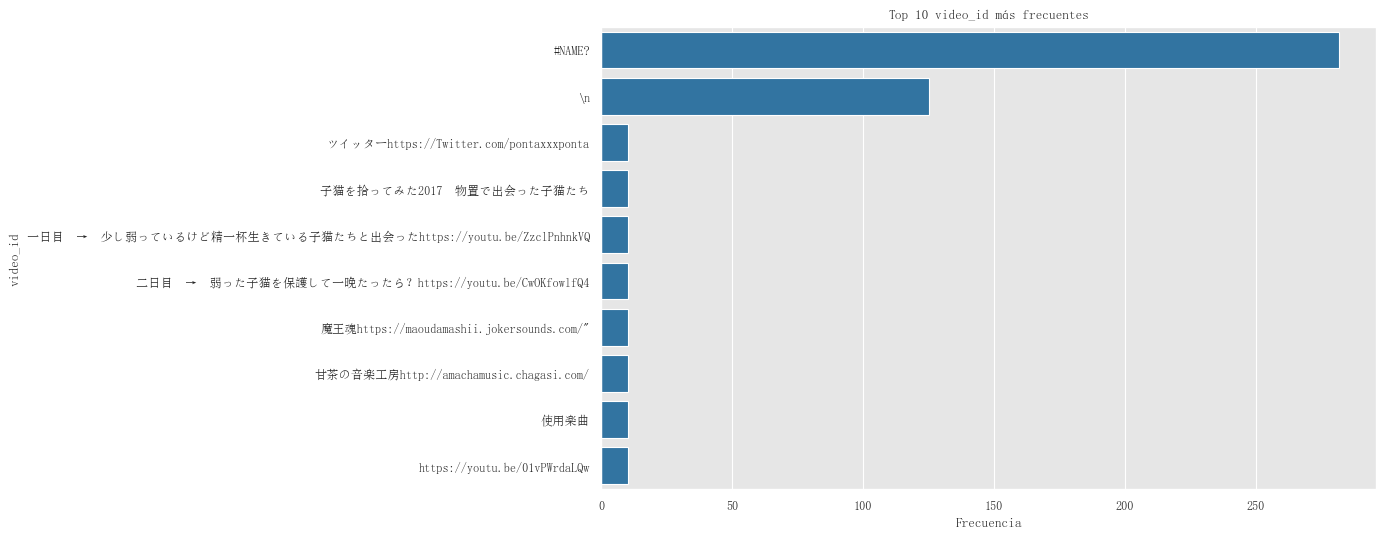

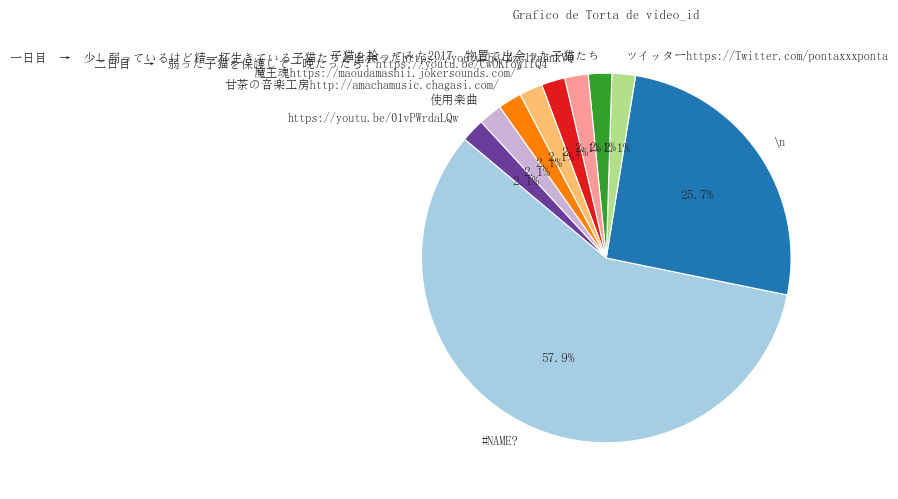

In [26]:
# video_id - Tabla de frecuencia de los 10 más frecuentes
video_id_counts = videos_data['video_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=video_id_counts.values, y=video_id_counts.index)
plt.title('Top 10 video_id más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('video_id')
plt.show()

plot_pie(videos_data, 'video_id', 'Grafico de Torta de video_id')

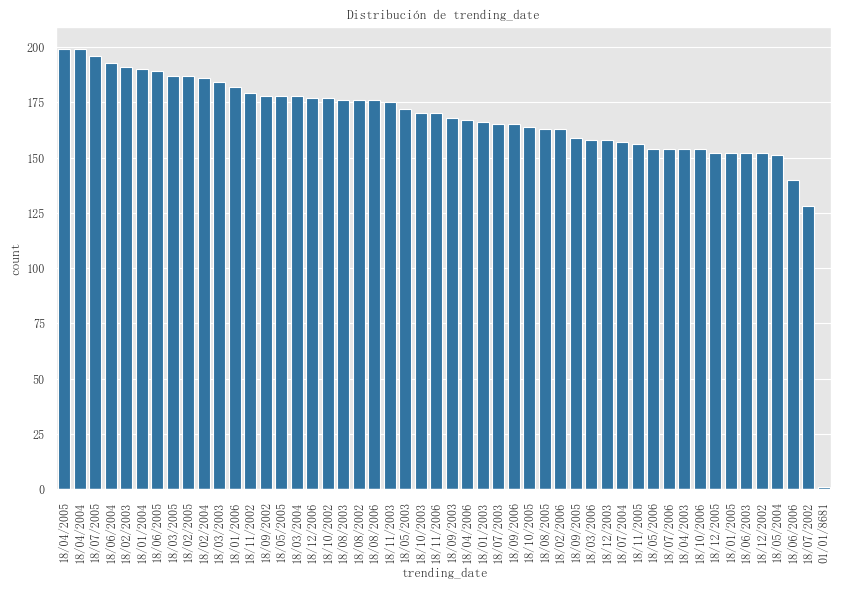

In [27]:
# trending_date - Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='trending_date', data=videos_data, order=videos_data['trending_date'].value_counts().index)
plt.title('Distribución de trending_date')
plt.xticks(rotation=90)
plt.show()

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12441 (\N{COMBINING KATAKANA-HIRAGANA VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


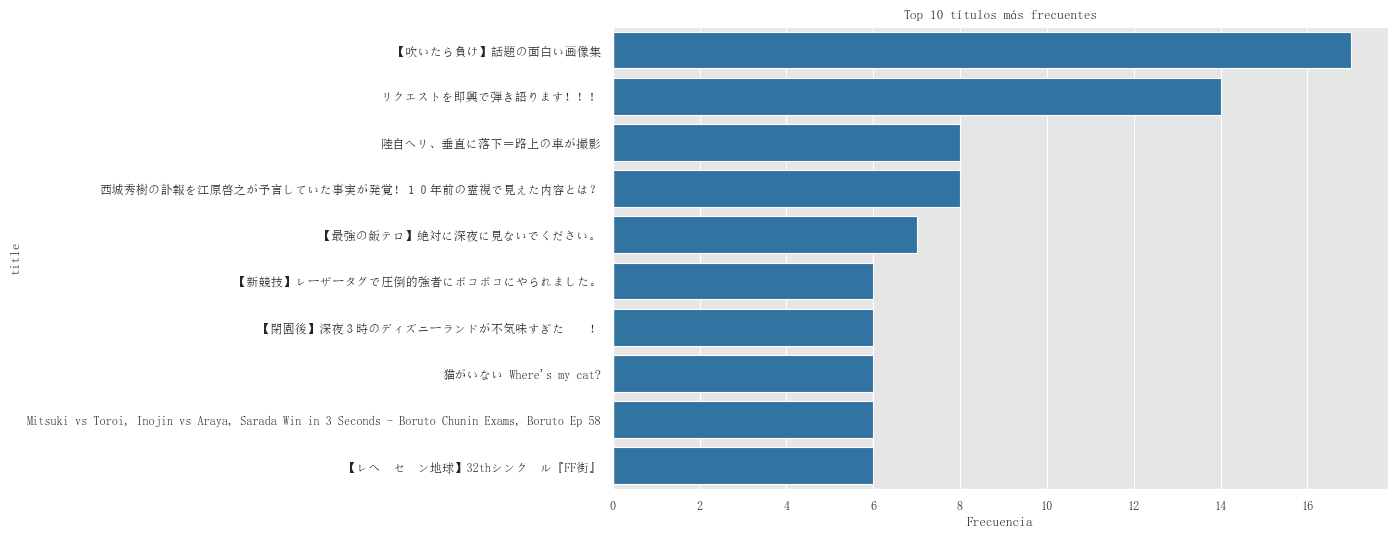

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12441 (\N{COMBINING KATAKANA-HIRAGANA VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


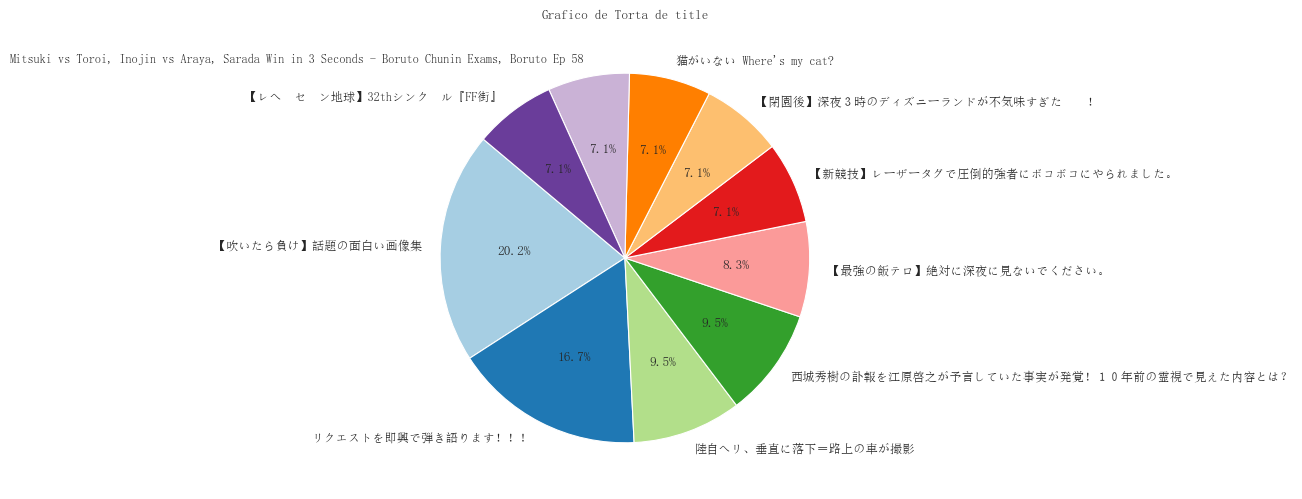

In [28]:
# title - Tabla de frecuencia de los 10 títulos más frecuentes
title_counts = videos_data['title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index)
plt.title('Top 10 títulos más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('title')
plt.show()

plot_pie(videos_data, 'title', 'Grafico de Torta de title')

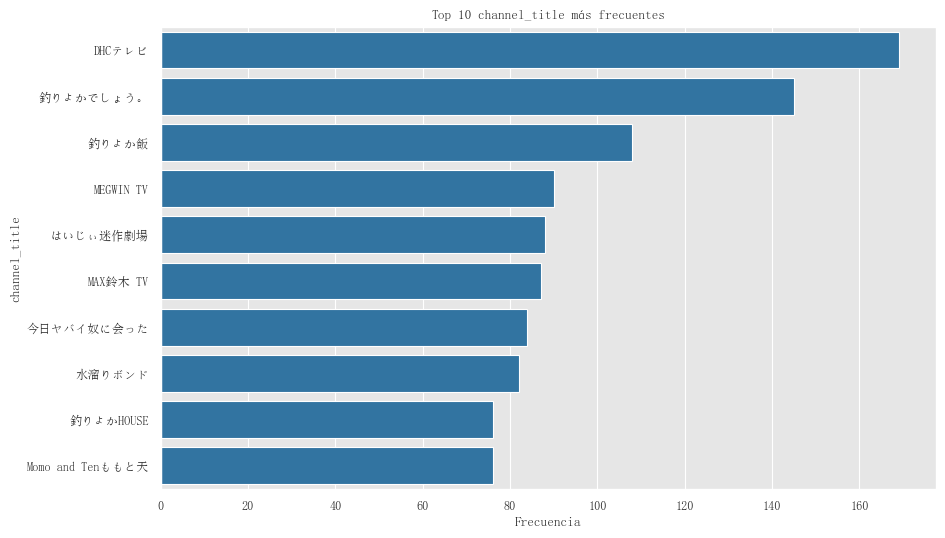

In [29]:
# channel_title - Gráfico de barras para los canales más frecuentes
channel_title_counts = videos_data['channel_title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_title_counts.values, y=channel_title_counts.index)
plt.title('Top 10 channel_title más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('channel_title')
plt.show()


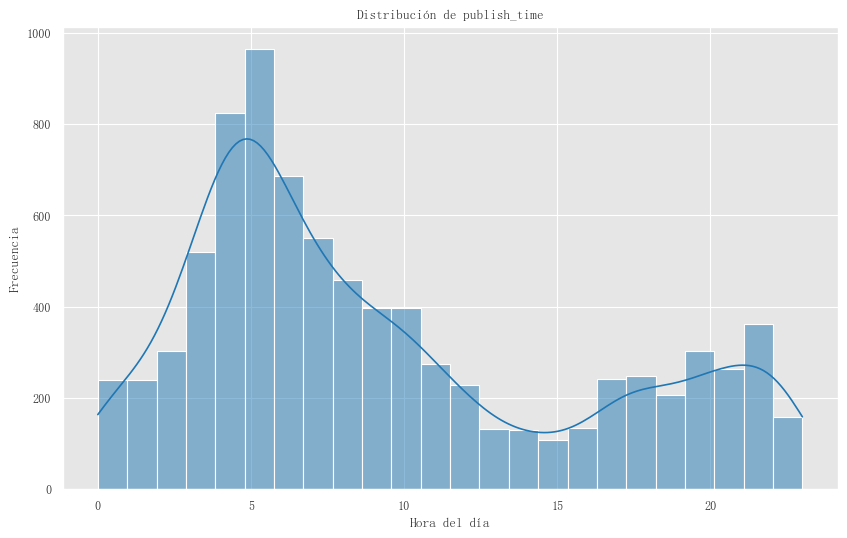

In [30]:
# publish_time - Histograma
plt.figure(figsize=(10, 6))
sns.histplot(pd.to_datetime(videos_data['publish_time'], errors='coerce').dt.hour, bins=24, kde=True)
plt.title('Distribución de publish_time')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.show()

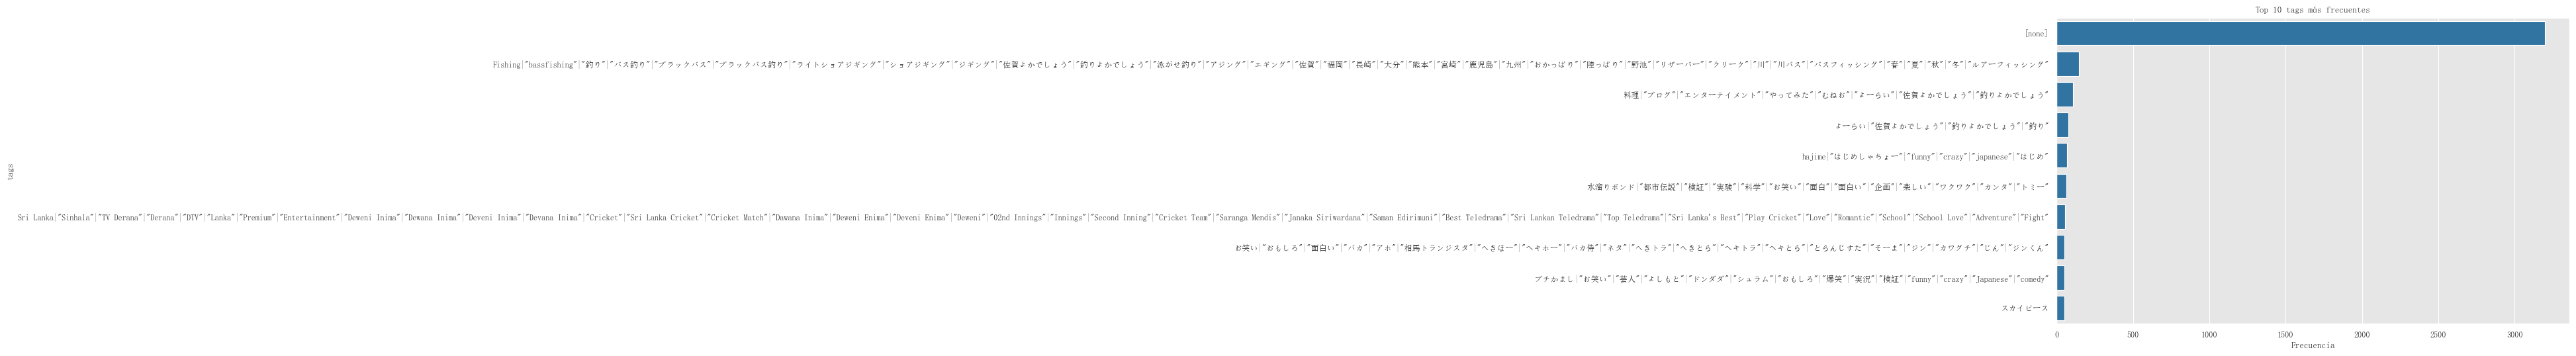

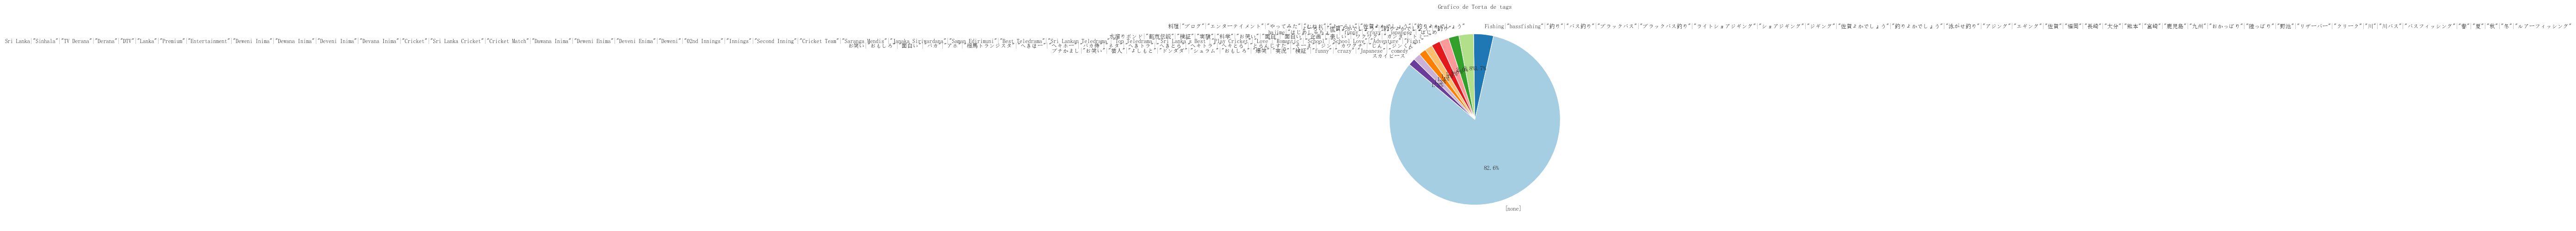

In [31]:
# tags - Tabla de frecuencia de los 10 tags más frecuentes
tags_counts = videos_data['tags'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=tags_counts.values, y=tags_counts.index)
plt.title('Top 10 tags más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('tags')
plt.show()

plot_pie(videos_data, 'tags', 'Grafico de Torta de tags')

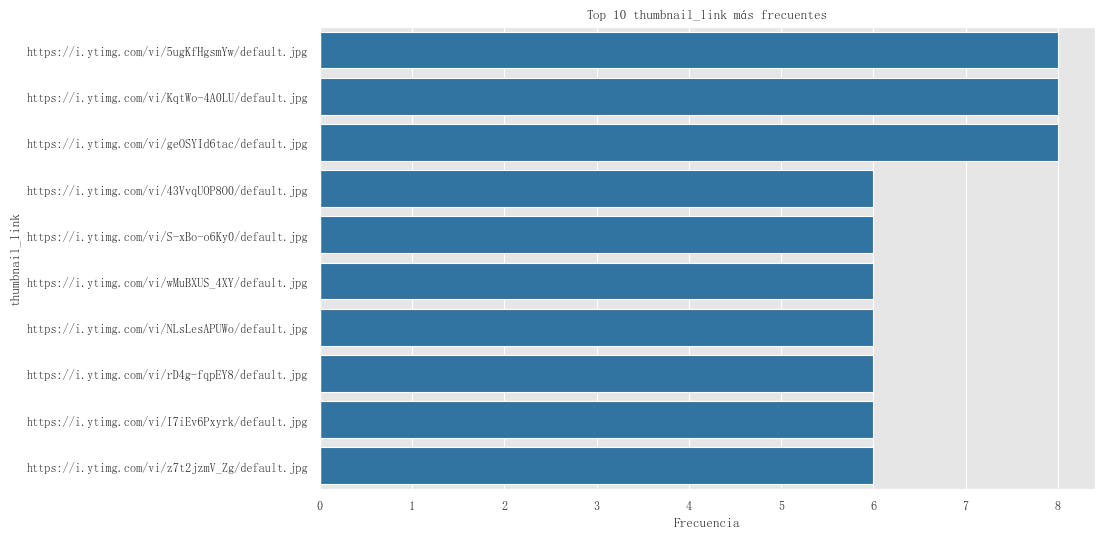

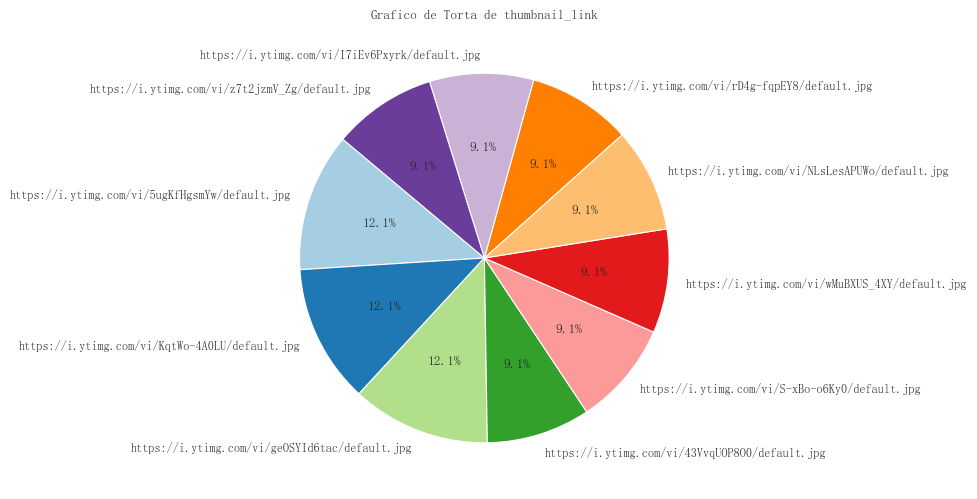

In [32]:
# thumbnail_link - Tabla de frecuencia de los 10 más frecuentes
thumbnail_link_counts = videos_data['thumbnail_link'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=thumbnail_link_counts.values, y=thumbnail_link_counts.index)
plt.title('Top 10 thumbnail_link más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('thumbnail_link')
plt.show()

plot_pie(videos_data, 'thumbnail_link', 'Grafico de Torta de thumbnail_link')

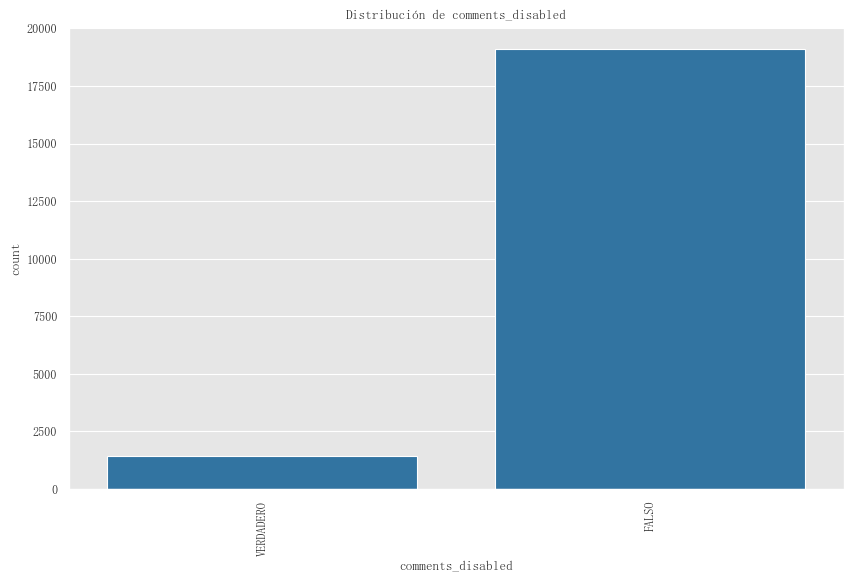

In [33]:

# comments_disabled - Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='comments_disabled', data=videos_data)
plt.title('Distribución de comments_disabled')
plt.xticks(rotation=90)
plt.show()

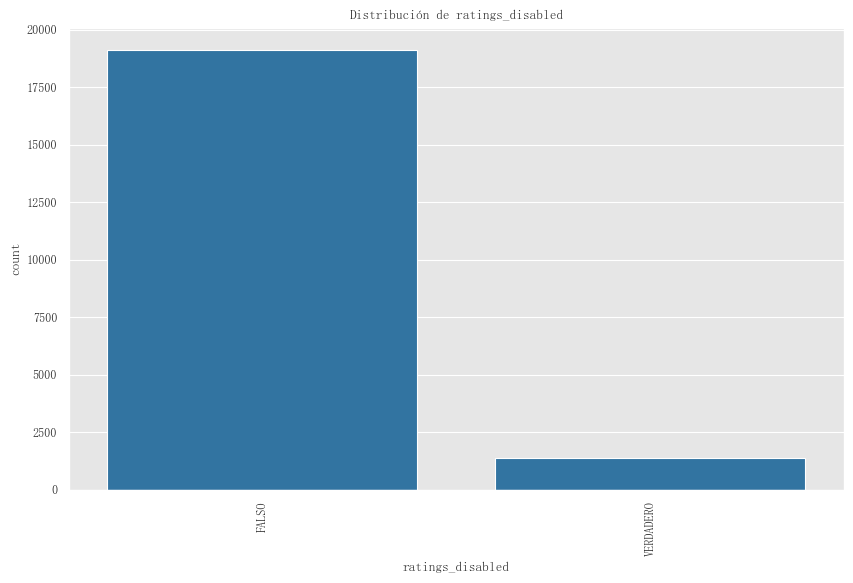

In [34]:
# ratings_disabled - Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='ratings_disabled', data=videos_data)
plt.title('Distribución de ratings_disabled')
plt.xticks(rotation=90)
plt.show()

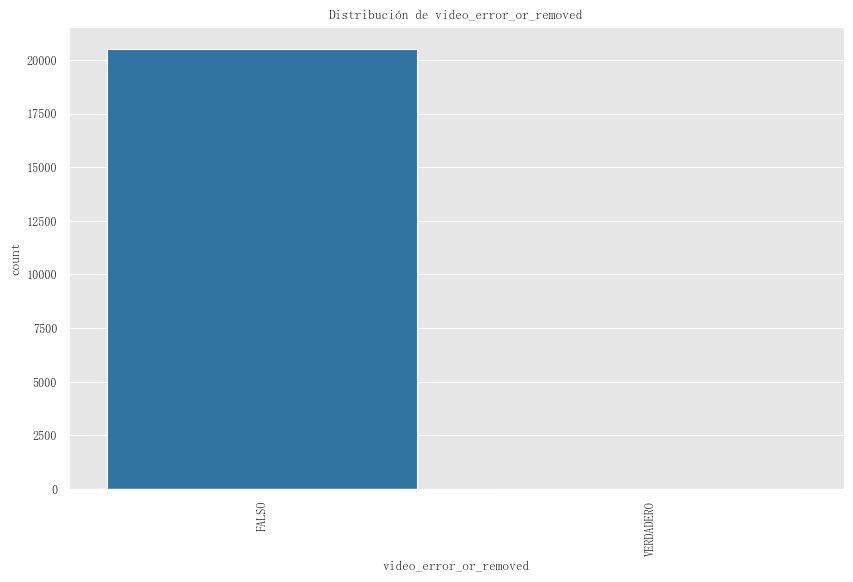

In [35]:
# video_error_or_removed - Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='video_error_or_removed', data=videos_data)
plt.title('Distribución de video_error_or_removed')
plt.xticks(rotation=90)
plt.show()

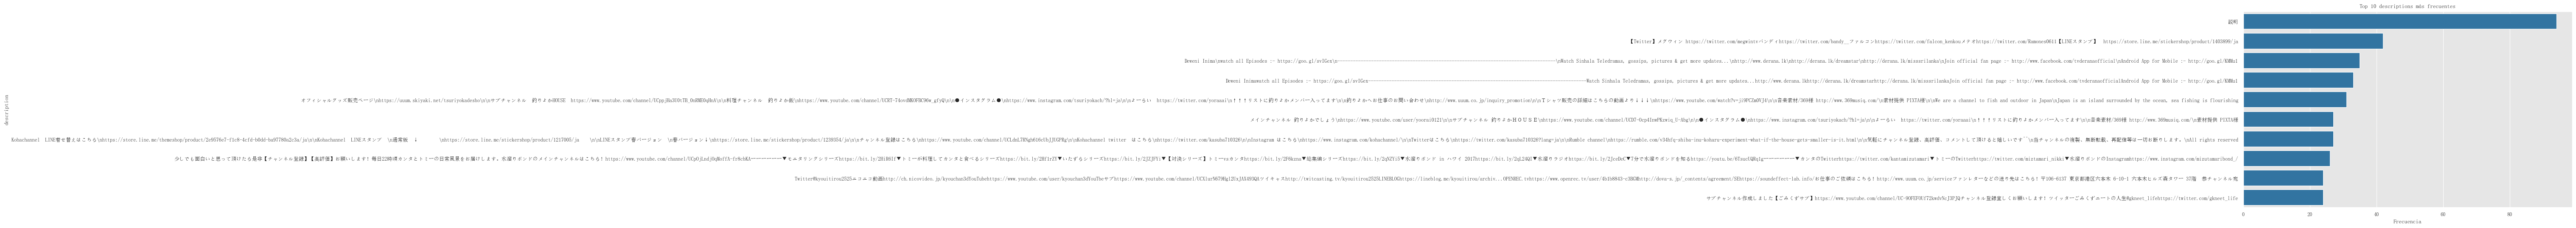

In [36]:
# description - Tabla de frecuencia de los 10 más frecuentes
description_counts = videos_data['description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=description_counts.values, y=description_counts.index)
plt.title('Top 10 descriptions más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('description')
plt.show()

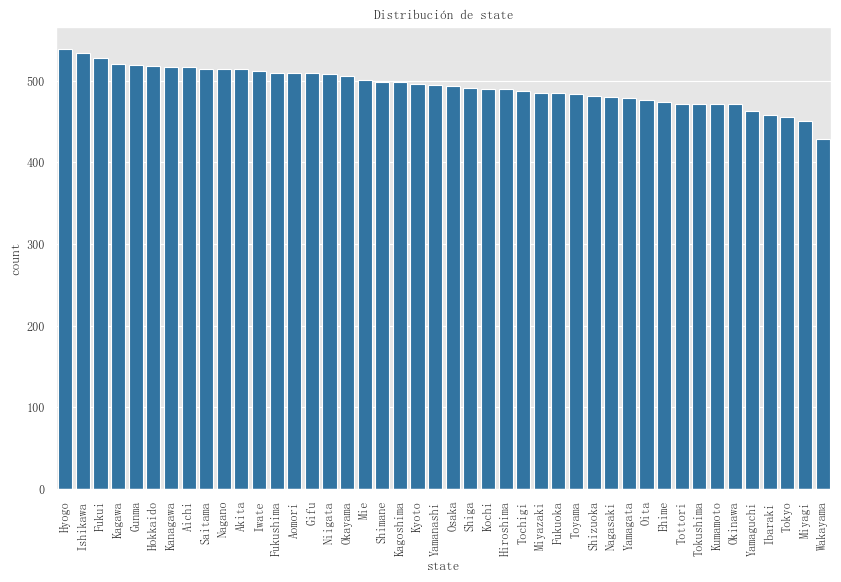

In [37]:
# state - Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=videos_data, order=videos_data['state'].value_counts().index)
plt.title('Distribución de state')
plt.xticks(rotation=90)
plt.show()

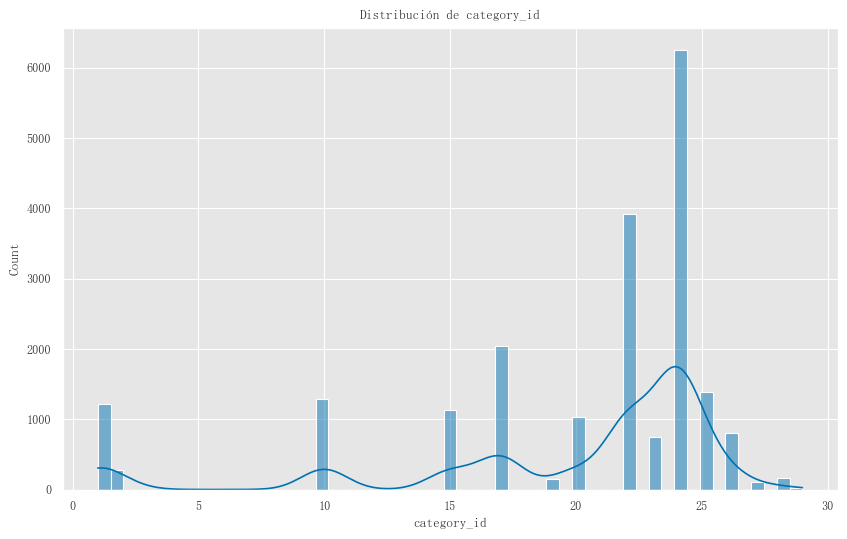

In [38]:
# Visualización de variables numéricas

# category_id - Histograma
plt.figure(figsize=(10, 6))
sns.histplot(x='category_id', data=videos_data, kde=True, color='#0072B2')
plt.title('Distribución de category_id')
plt.show()

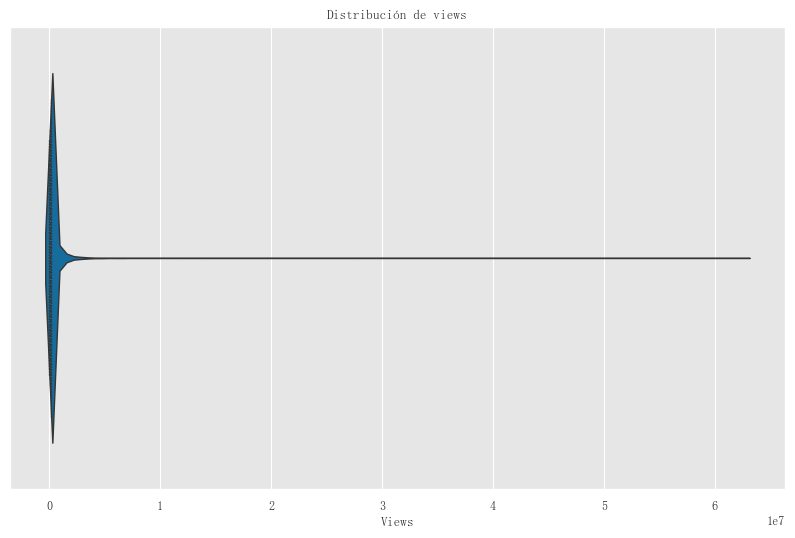

In [39]:
# views - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=videos_data['views'], inner='quartile', color='#0072B2')
plt.title('Distribución de views')
plt.xlabel('Views')
plt.show()


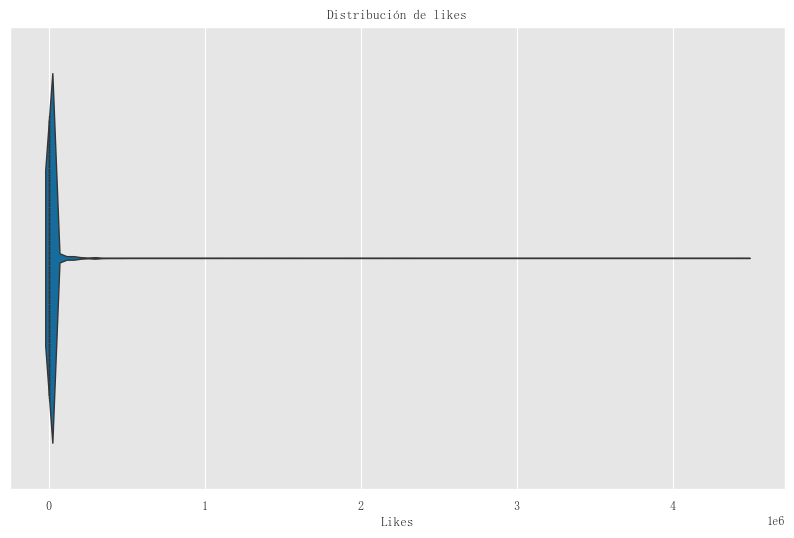

In [40]:
# likes - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=videos_data['likes'], inner='quartile', color='#0072B2')
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.show()

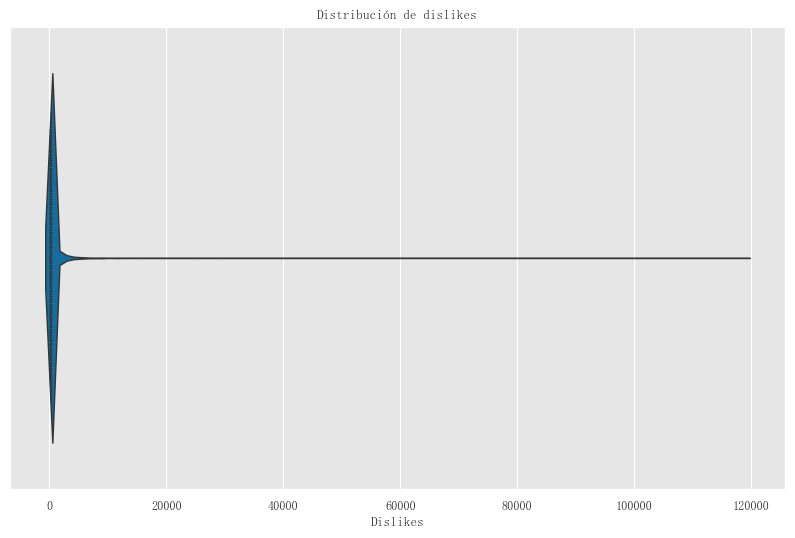

In [41]:
# dislikes - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=videos_data['dislikes'], inner='quartile', color='#0072B2')
plt.title('Distribución de dislikes')
plt.xlabel('Dislikes')
plt.show()

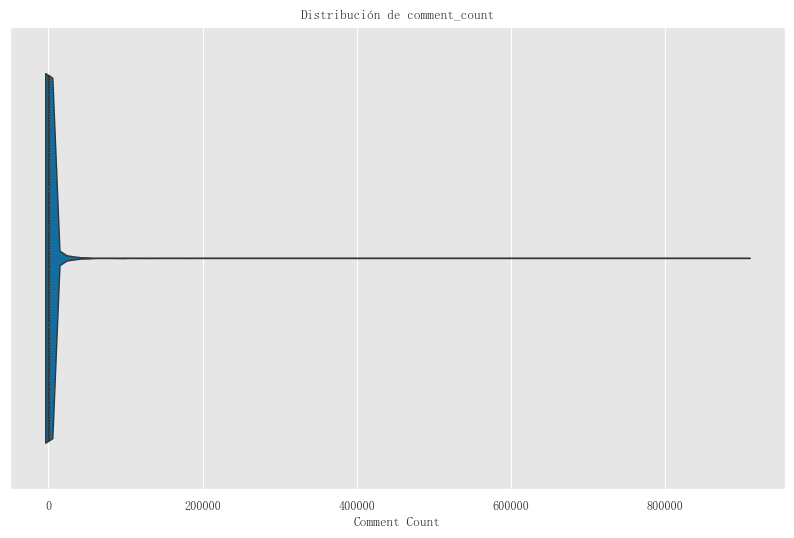

In [42]:
# comment_count - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=videos_data['comment_count'], inner='quartile', color='#0072B2')
plt.title('Distribución de comment_count')
plt.xlabel('Comment Count')
plt.show()

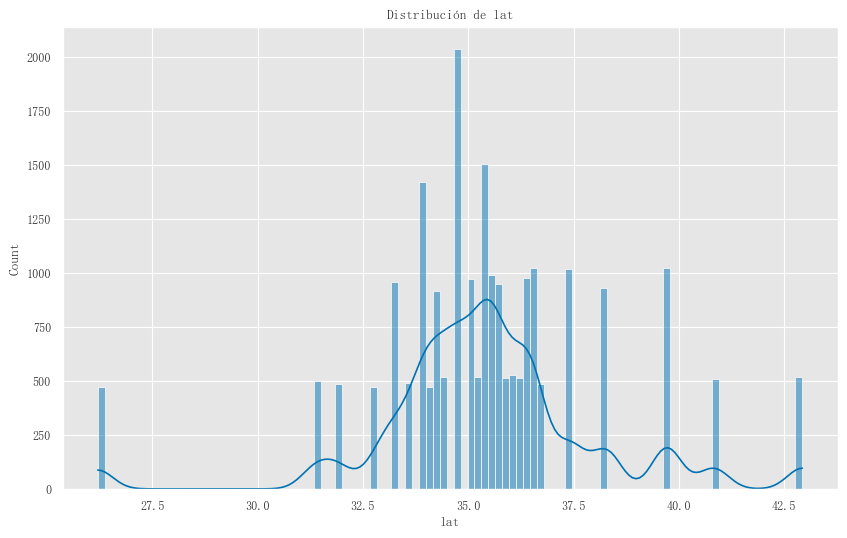

In [43]:
# lat - Histograma
plt.figure(figsize=(10, 6))
sns.histplot(x='lat', data=videos_data, kde=True, color='#0072B2')
plt.title('Distribución de lat')
plt.show()

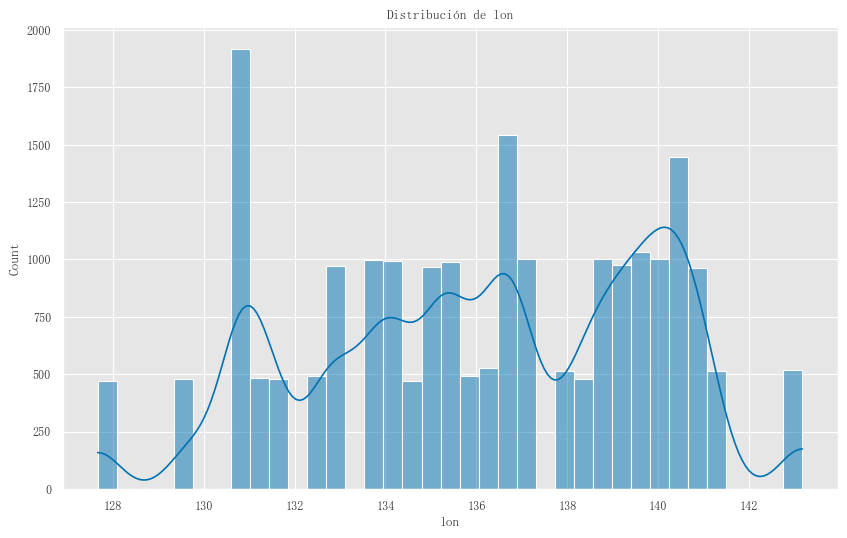

In [44]:
# lon - Histograma
plt.figure(figsize=(10, 6))
sns.histplot(x='lon', data=videos_data, kde=True, color='#0072B2')
plt.title('Distribución de lon')
plt.show()

# **VERIFICAR LA CALIDAD DE LOS DATOS**

In [50]:
# Verificar qué columnas tienen datos faltantes (NULLS) y cuántos hay en cada una
missing_data = df.isnull().sum()
print(missing_data)

video_id                    273
trending_date             13401
title                      1190
channel_title              1190
category_id                1194
publish_time              13356
tags                       1193
views                      1196
likes                      1196
dislikes                   1196
comment_count              1196
thumbnail_link             1196
comments_disabled          1196
ratings_disabled           1196
video_error_or_removed     1196
description                3320
state                         0
lat                           0
lon                           0
geometry                      0
category_title             1213
dtype: int64


In [57]:
# Verificar valores fuera de rango en las columnas numéricas
out_of_range_views = df[df['views'] < 0].shape[0]
out_of_range_likes = df[df['likes'] < 0].shape[0]
out_of_range_dislikes = df[df['dislikes'] < 0].shape[0]
out_of_range_comments = df[df['comment_count'] < 0].shape[0]

# Verificar valores fuera de rango en 'category_id'
valid_category_ids = categories_df['category_id'].unique()
out_of_range_category_id = df[~df['category_id'].isin(valid_category_ids)].shape[0]

# Imprimir los resultados
print(f"Valores fuera de rango en 'views': {out_of_range_views}")
print(f"Valores fuera de rango en 'likes': {out_of_range_likes}")
print(f"Valores fuera de rango en 'dislikes': {out_of_range_dislikes}")
print(f"Valores fuera de rango en 'comment_count': {out_of_range_comments}")
print(f"Valores fuera de rango en 'category_id': {out_of_range_category_id}")


Valores fuera de rango en 'views': 0
Valores fuera de rango en 'likes': 0
Valores fuera de rango en 'dislikes': 0
Valores fuera de rango en 'comment_count': 0
Valores fuera de rango en 'category_id': 9


In [47]:
# Convertir las columnas necesarias a los tipos adecuados
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%d/%m/%Y', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Verificar el rango de fechas
print("Rango de fechas en 'trending_date':", df['trending_date'].min(), "a", df['trending_date'].max())
print("Rango de fechas en 'publish_time':", df['publish_time'].min(), "a", df['publish_time'].max())


Rango de fechas en 'trending_date': 2002-07-18 00:00:00 a 2006-12-18 00:00:00
Rango de fechas en 'publish_time': 2015-07-11 20:08:00 a 2018-12-06 22:47:00


In [55]:
# Verificar valores únicos en campos booleanos
print("Valores únicos en 'comments_disabled':", df['comments_disabled'].unique())
print("Valores únicos en 'ratings_disabled':", df['ratings_disabled'].unique())
print("Valores únicos en 'video_error_or_removed':", df['video_error_or_removed'].unique())

Valores únicos en 'comments_disabled': ['VERDADERO' 'FALSO']
Valores únicos en 'ratings_disabled': ['FALSO' 'VERDADERO']
Valores únicos en 'video_error_or_removed': ['FALSO' 'VERDADERO']


# **PREPARACION Y LIMPIEZA DE LOS DATOS**

In [51]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Reemplazar valores faltantes en columnas categóricas con la moda
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verificar que no queden valores nulos en las columnas categóricas
print(df[categorical_columns].isnull().sum())

video_id                  0
title                     0
channel_title             0
tags                      0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
geometry                  0
category_title            0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\815596579.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [52]:
# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Reemplazar valores faltantes en columnas numéricas con la media
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verificar que no queden valores nulos en las columnas numéricas
print(df[numeric_columns].isnull().sum())

category_id      0
views            0
likes            0
dislikes         0
comment_count    0
lat              0
lon              0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\3617305753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [53]:
# Eliminar filas con datos faltantes en todas las columnas
df.dropna(inplace=True)

# Verificar que no queden valores nulos en el DataFrame
print(df.isnull().sum())


video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
category_title            0
dtype: int64


In [54]:
# Guardamos nuestro dataFrame ya limpio en un nuevo archivo
df.to_csv('datos_procesados.csv', index=False)

print("Datos procesados guardados en 'datos_procesados.csv'.")

Datos procesados guardados en 'datos_procesados.csv'.


# **RESULTADO DE LOS REQUERIMIENTOS SOLICITADOS**

In [60]:
# Importamos todas las librerias necesarias para resolver los requerimientos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV con los datos limpios en un dataframe
df = pd.read_csv('Dataset/datos_procesados.csv')

# Función para mostrar gráficos
def show_plot(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

**1. ¿Qué categorías de videos son las de mayor tendencia?**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\3089856125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_categorias.index, y=trending_categorias.values, palette='viridis')


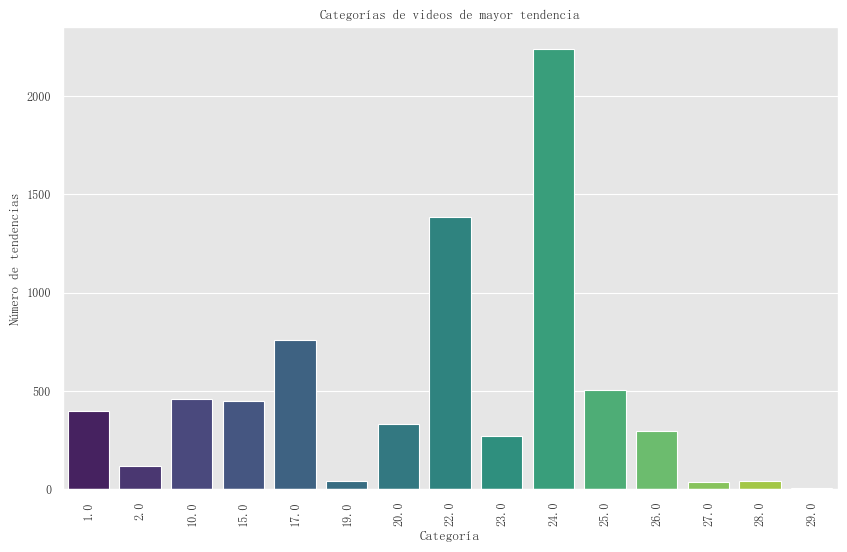

In [62]:
trending_categorias = df['category_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_categorias.index, y=trending_categorias.values, palette='viridis')
show_plot('Categorías de videos de mayor tendencia', 'Categoría', 'Número de tendencias')

**# 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\2703878414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_por_categoria.index, y=likes_por_categoria.values, palette='viridis')


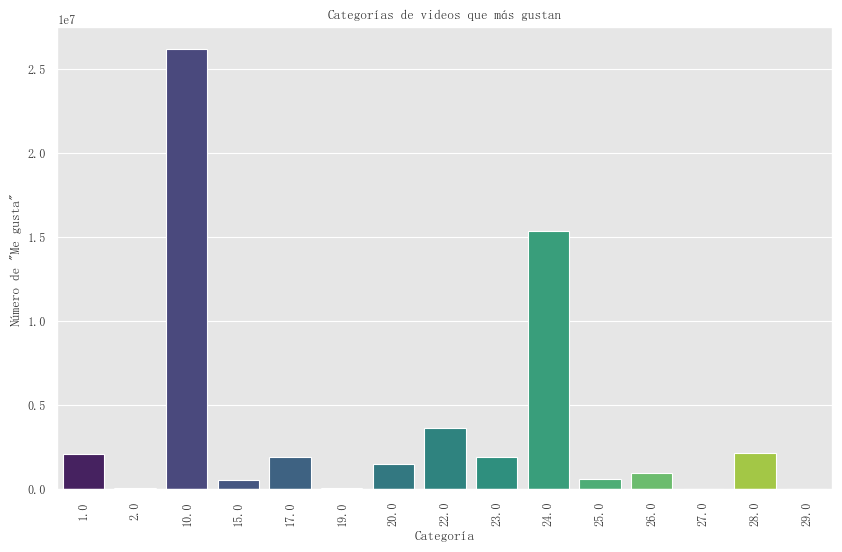

In [63]:
likes_por_categoria = df.groupby('category_id')['likes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=likes_por_categoria.index, y=likes_por_categoria.values, palette='viridis')
show_plot('Categorías de videos que más gustan', 'Categoría', 'Número de "Me gusta"')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\1063386313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dislikes_por_categoria.index, y=dislikes_por_categoria.values, palette='viridis')


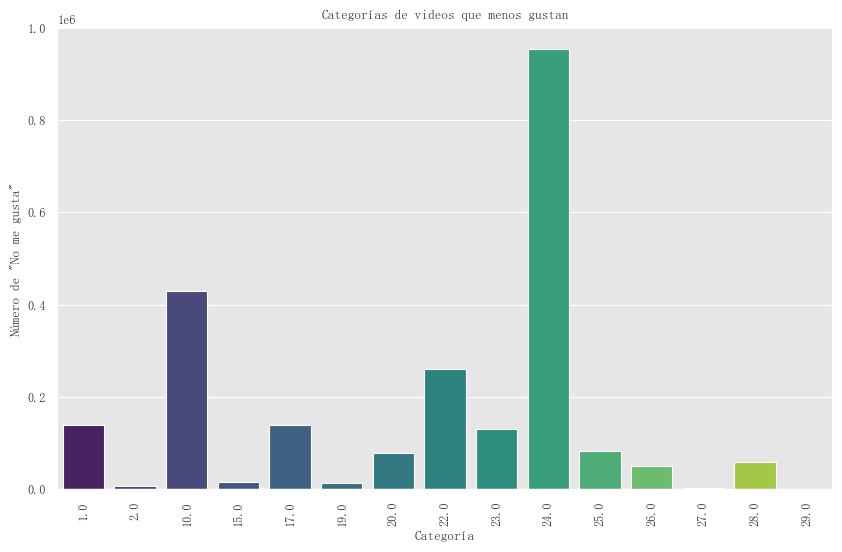

In [64]:
dislikes_por_categoria = df.groupby('category_id')['dislikes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=dislikes_por_categoria.index, y=dislikes_por_categoria.values, palette='viridis')
show_plot('Categorías de videos que menos gustan', 'Categoría', 'Número de "No me gusta"')

**# 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\1462518592.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_con_likes_dislikes.index, y=ratio_con_likes_dislikes.values, palette='viridis')


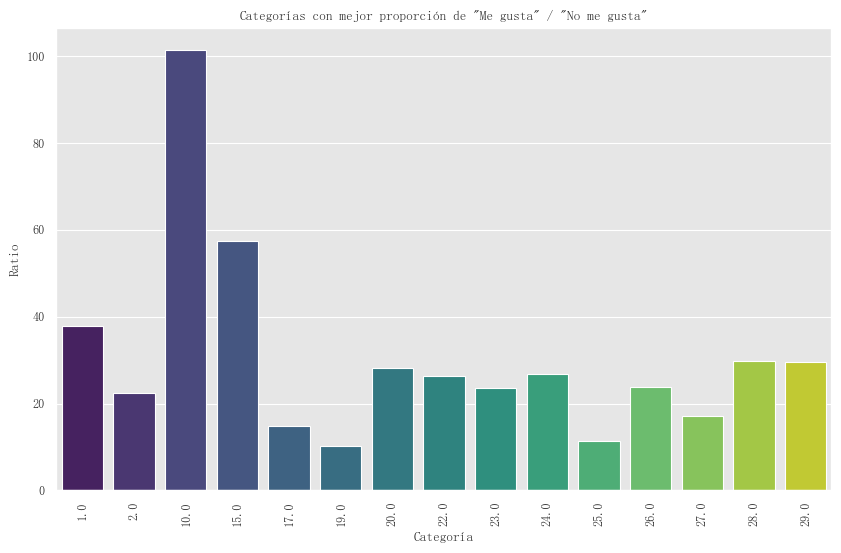

In [65]:
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # Evitamos la división entre 0 para no tener errores
ratio_con_likes_dislikes = df.groupby('category_id')['like_dislike_ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio_con_likes_dislikes.index, y=ratio_con_likes_dislikes.values, palette='viridis')
show_plot('Categorías con mejor proporción de "Me gusta" / "No me gusta"', 'Categoría', 'Ratio')

**# 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\2285867310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_views_y_comments.index, y=ratio_views_y_comments.values, palette='viridis')


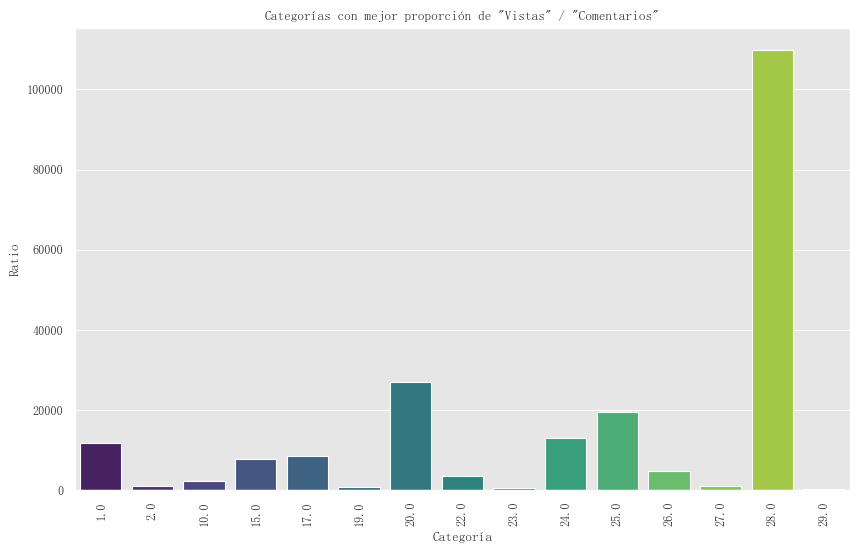

In [66]:
df['views_comments_ratio'] = df['views'] / (df['comment_count'] + 1)  # Evitamos la división entre 0 para no tener errores
ratio_views_y_comments = df.groupby('category_id')['views_comments_ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio_views_y_comments.index, y=ratio_views_y_comments.values, palette='viridis')
show_plot('Categorías con mejor proporción de "Vistas" / "Comentarios"', 'Categoría', 'Ratio')

**# 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

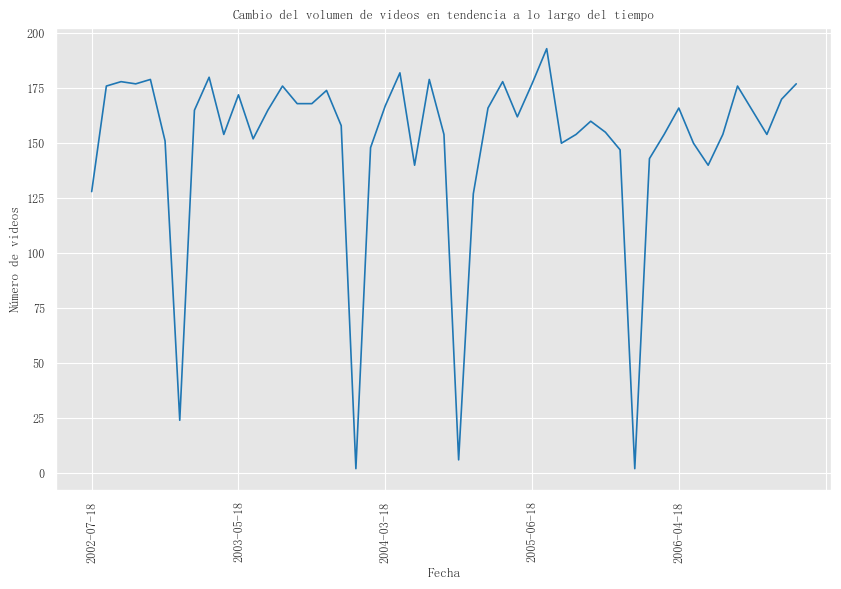

In [67]:
volumen_atravez_deltiempo = df['trending_date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
volumen_atravez_deltiempo.plot()
show_plot('Cambio del volumen de videos en tendencia a lo largo del tiempo', 'Fecha', 'Número de videos')


**# 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\4267581222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canales_famosos.index, y=canales_famosos.values, palette='viridis')


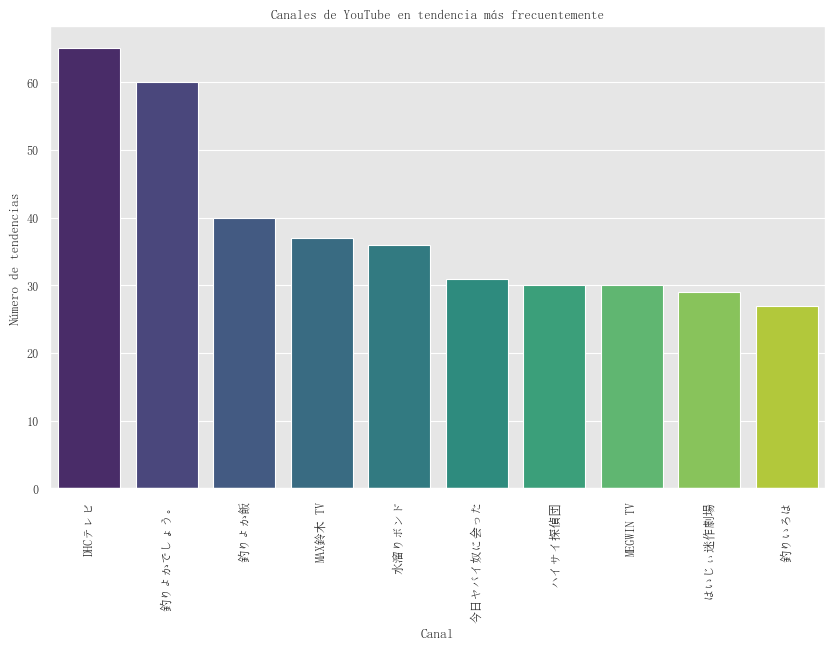

In [68]:
canales_famosos = df['channel_title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=canales_famosos.index, y=canales_famosos.values, palette='viridis')
show_plot('Canales de YouTube en tendencia más frecuentemente', 'Canal', 'Número de tendencias')

**# 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\261667161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vistas_por_estado.index, y=vistas_por_estado.values, palette='viridis')


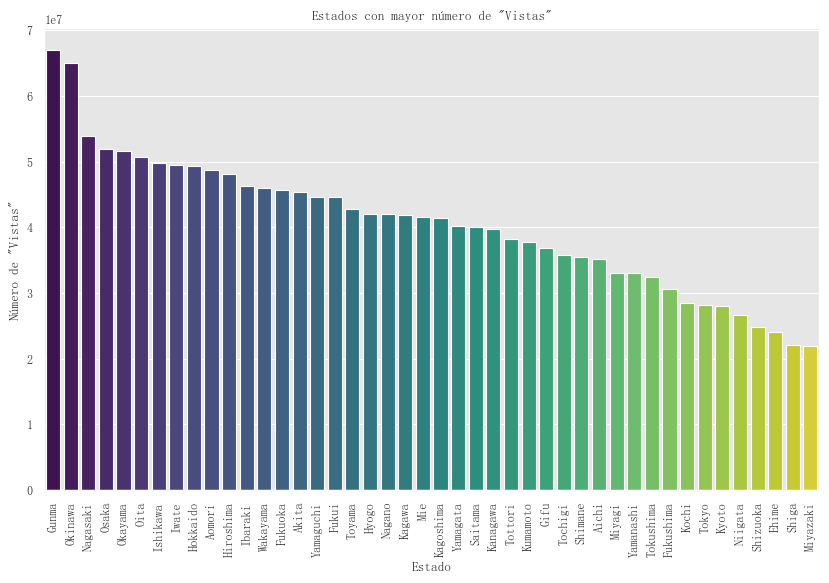

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\261667161.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_por_estado.index, y=likes_por_estado.values, palette='viridis')


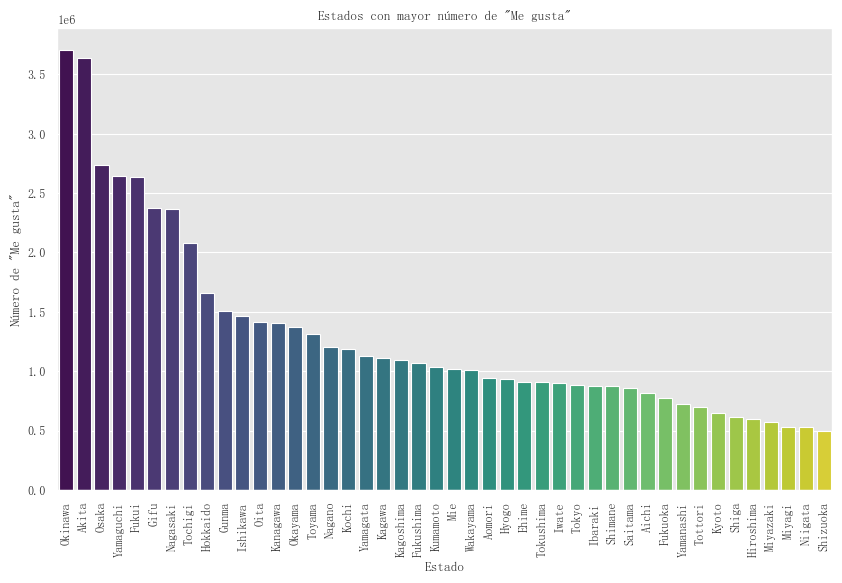

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\261667161.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dislikes_por_estados.index, y=dislikes_por_estados.values, palette='viridis')


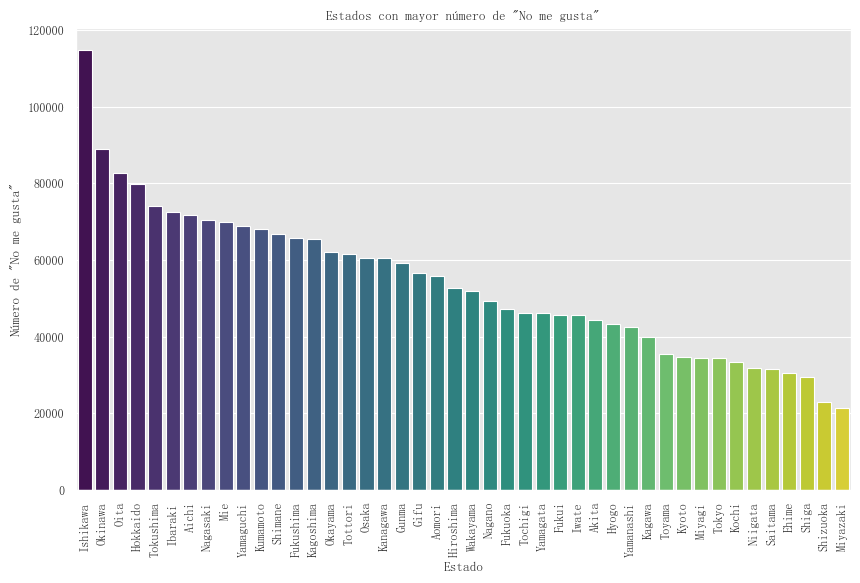

In [69]:
vistas_por_estado = df.groupby('state')['views'].sum().sort_values(ascending=False)
likes_por_estado = df.groupby('state')['likes'].sum().sort_values(ascending=False)
dislikes_por_estados = df.groupby('state')['dislikes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=vistas_por_estado.index, y=vistas_por_estado.values, palette='viridis')
show_plot('Estados con mayor número de "Vistas"', 'Estado', 'Número de "Vistas"')

plt.figure(figsize=(10, 6))
sns.barplot(x=likes_por_estado.index, y=likes_por_estado.values, palette='viridis')
show_plot('Estados con mayor número de "Me gusta"', 'Estado', 'Número de "Me gusta"')

plt.figure(figsize=(10, 6))
sns.barplot(x=dislikes_por_estados.index, y=dislikes_por_estados.values, palette='viridis')
show_plot('Estados con mayor número de "No me gusta"', 'Estado', 'Número de "No me gusta"')


**# 8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?**

Si, y es posible hacer un modelo ya que dado el tipo de data que se tiene en nuestro conjunto de datos se puede aplicar el tipo de aprendizaje supervisado y será de clasificacion ya que nuestra variable dependiente es de tipo cualitativa.

**# 9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?**

Videos en tendencia con mayor cantidad de comentarios positivos:
 video_id
#NAME?         96
KqtWo-4A0LU     8
S-xBo-o6Ky0     6
43VvqUOP8O0     6
WQR6CjgaDkM     5
48bqj6TqVms     5
zYole14OSec     5
OtKwFE5hWCM     5
7glUp6bDU-k     5
QS3QMpu907w     5
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16508\789616601.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_positive_comments.index, y=trending_positive_comments.values, palette='viridis')


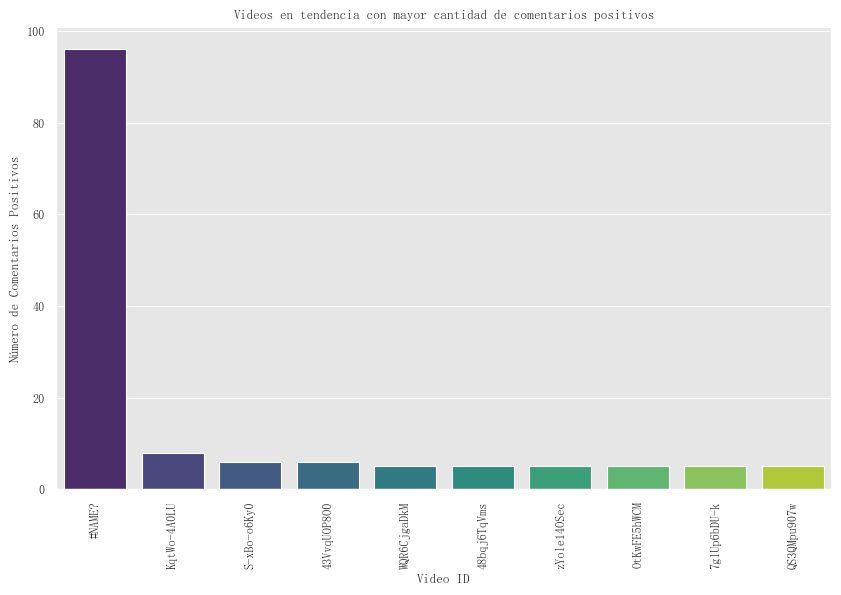

In [71]:
# Convertir 'comments_disabled' a booleano
df['comments_disabled'] = df['comments_disabled'].astype(bool)

# Convertir 'comment_count' a numérico
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce').fillna(0).astype(int)

# Calcular comentarios positivos
df['positive_comments'] = df['comment_count'] - df['comments_disabled'].astype(int)

# Filtrar videos con comentarios positivos
positive_comments = df[df['positive_comments'] > 0]

# Mostrar los videos en tendencia con mayor cantidad de comentarios positivos
trending_positive_comments = positive_comments['video_id'].value_counts().head(10)
print("Videos en tendencia con mayor cantidad de comentarios positivos:\n", trending_positive_comments)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_positive_comments.index, y=trending_positive_comments.values, palette='viridis')
plt.title('Videos en tendencia con mayor cantidad de comentarios positivos')
plt.xlabel('Video ID')
plt.ylabel('Número de Comentarios Positivos')
plt.xticks(rotation=90)
plt.show()

# **MODELIZAR Y EVALUAR LOS RESULTADOS**

Modelo para predecir el numero de views a partir de los likes y dislikes utilizando aprendizaje supervisado con regresion logistica

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, explained_variance_score

# Cargar el dataset
df = pd.read_csv('Dataset/datos_procesados.csv')

# Preparar los datos
# Crear una nueva columna para la clasificación binaria
average_views = df['views'].mean()
df['above_average_views'] = (df['views'] > average_views).astype(int)

X = df[['likes', 'dislikes']]
y = df['above_average_views']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir con el modelo
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
error_porcentaje = 1 - accuracy
varianza = explained_variance_score(y_test, y_pred)

print(f"Precisión: {accuracy}")
print(f"Porcentaje de error: {error_porcentaje}")
print(f"Varianza (R^2): {varianza}")


Precisión: 0.8958475153165418
Porcentaje de error: 0.10415248468345817
Varianza (R^2): 0.3138267134106405


Modelo para predecir el numero de likes a partir de las views y dislikes utilizando aprendizaje supervisado con regresion logistica

In [5]:
# Cargar el dataset
df = pd.read_csv('Dataset/datos_procesados.csv')

# Preparar los datos
# Crear una nueva columna para la clasificación binaria
average_views = df['likes'].mean()
df['above_average_likes'] = (df['likes'] > average_views).astype(int)

X = df[['views', 'dislikes']]
y = df['above_average_likes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir con el modelo
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
error_porcentaje = 1 - accuracy
varianza = explained_variance_score(y_test, y_pred)

print(f"Precisión: {accuracy}")
print(f"Porcentaje de error: {error_porcentaje}")
print(f"Varianza (R^2): {varianza}")


Precisión: 0.9414567733151804
Porcentaje de error: 0.058543226684819594
Varianza (R^2): 0.336106453183318


Modelo para predecir el numero de dislikes a partir de las views y likes utilizando aprendizaje supervisado con regresion logistica

In [6]:
# Cargar el dataset
df = pd.read_csv('Dataset/datos_procesados.csv')

# Preparar los datos
# Crear una nueva columna para la clasificación binaria
average_views = df['dislikes'].mean()
df['above_average_dislikes'] = (df['dislikes'] > average_views).astype(int)

X = df[['views', 'likes']]
y = df['above_average_dislikes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir con el modelo
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
error_porcentaje = 1 - accuracy
varianza = explained_variance_score(y_test, y_pred)

print(f"Precisión: {accuracy}")
print(f"Porcentaje de error: {error_porcentaje}")
print(f"Varianza (R^2): {varianza}")


Precisión: 0.9121851599727706
Porcentaje de error: 0.08781484002722939
Varianza (R^2): 0.3159964575734381
